# Final Project

## Introduction
### What is the machine learning problem you are trying to solve? 

The problem with today's dating apps, is that they show you possible matches based on a user's search criterial. That could be an age range, a distance preference, and their sex. We think that this amount of attributes allow for a shallow way of looking at potential matches. Reasong being, because the majority of those matches are based on looks alone. And if two users decide to go on a date, there is a great chance that they won't be going on a second date. So, we want to maximize the probability that if two users match and go on a date, they will have a better experience and increase their odds of going on a second date. 

### Why does the problem matter?

Given how society has evolved with techonology, we need to create an environment for dating that is more personal as if it were two people meeting in real life. For example, when two people decide to go on a date in person, they know a lot more about each other than if they had just swipped right based on a short bio and some pictures. In-person dating is more personal because, for the most part, the people involved know more about each other. They has a grasp of their personality, and the things they like, and use those to make a decision on whether to go on a date or not. 


### What could the result of your predictive model be used for?

The results can be used to make matching suggestions to users based on personal attributes from both parties. This will, hopefully, create a better dating experience. 

### Why would we want to be able to predict the thing you're trying to predict? 

To make matching predictions that are meaningful and create value to the organization that implement this model and the users.


### Describe the dataset that you will use to tackle this problem

The dataset contains records with 123 attributes. Each individual record contains attributes for 2 people and their attributes like age, education, friendliness, how funny they are, attractiveness, etc. It also contains attributes that show what they value in a significant other. 



# Data Cleaning

This dataset contains 8000+ records, and some might contain incomplete features, so we have to explore the data and then take appropriate data cleaning actions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
data = pd.read_csv("speeddating.csv", header='infer')
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)
data

(8378, 123)
(8378, 123)


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


we decided that it's better to select features first and then clean up the data that belong to the feature columns that we want to focus on.

In [2]:
cols_to_drop = [col for col in data.columns if col.startswith("d_")]
data = data.drop(columns = cols_to_drop)
print(data.shape)
cols_to_drop = ["has_null","wave","sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga", "expected_happy_with_sd_people","expected_num_interested_in_me","expected_num_matches", "guess_prob_liked", "met", "field", "decision", "decision_o"]
# cols_to_drop = ["expected_happy_with_sd_people","expected_num_interested_in_me","expected_num_matches", "guess_prob_liked", "met"]
data = data.drop(columns = cols_to_drop)
print(data.shape)
print(data.columns)
data

(8378, 67)
(8378, 40)
Index(['gender', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive', 'sincere', 'intelligence',
       'funny', 'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate', 'like', 'match'],
      dtype='object')


,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,match
0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,35.0,20.0,...,7.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,7.0,b'0'
1,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,60.0,0.0,...,7.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,7.0,b'0'
2,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,19.0,18.0,...,7.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,7.0,b'1'
3,b'female',21.0,23.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,30.0,5.0,...,7.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,7.0,b'1'
4,b'female',21.0,24.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',2.0,4.0,30.0,10.0,...,7.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,6.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'male',25.0,26.0,b'European/Caucasian-American',b'Latino/Hispanic American',b'0',1.0,1.0,10.0,10.0,...,7.0,3.0,5.0,5.0,5.0,NaN,NaN,0.64,2.0,b'0'
8374,b'male',25.0,24.0,b'European/Caucasian-American',b'Other',b'0',1.0,1.0,50.0,20.0,...,7.0,4.0,6.0,8.0,4.0,4.0,NaN,0.71,4.0,b'0'
8375,b'male',25.0,29.0,b'European/Caucasian-American',b'Latino/Hispanic American',b'0',1.0,1.0,40.0,10.0,...,7.0,4.0,7.0,8.0,8.0,8.0,NaN,-0.46,6.0,b'0'
8376,b'male',25.0,22.0,b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',1.0,1.0,10.0,25.0,...,7.0,4.0,6.0,5.0,4.0,NaN,5.0,0.62,5.0,b'0'


### We want to determine which cols have null values in them

In [3]:

# count null values in each col

null_columns = data.isnull().sum()

cols_with_null_values = null_columns[null_columns > 0].index.tolist()

print(f"Total headers with missing values: {len(cols_with_null_values)} ")

print()
print("Names of headers with missing values:")
print()
for i, col in enumerate(null_columns):
    print(f"Total missing values: {col}. Header name: {data.columns[i]}")

Total headers with missing values: 35 

Names of headers with missing values:

Total missing values: 0. Header name: gender
Total missing values: 95. Header name: age
Total missing values: 104. Header name: age_o
Total missing values: 0. Header name: race
Total missing values: 0. Header name: race_o
Total missing values: 0. Header name: samerace
Total missing values: 79. Header name: importance_same_race
Total missing values: 79. Header name: importance_same_religion
Total missing values: 89. Header name: pref_o_attractive
Total missing values: 89. Header name: pref_o_sincere
Total missing values: 89. Header name: pref_o_intelligence
Total missing values: 98. Header name: pref_o_funny
Total missing values: 107. Header name: pref_o_ambitious
Total missing values: 129. Header name: pref_o_shared_interests
Total missing values: 212. Header name: attractive_o
Total missing values: 287. Header name: sinsere_o
Total missing values: 306. Header name: intelligence_o
Total missing values: 360. 

### There are 35 cols with missing values. Next, we will figure out which features are important and which are not. Based on the importance we might have to either drop the feature or impute them with some value calculated based on the context of the feature

#### Based on the results from above, we decided to impute the age and age_o cols and drop everything else. 

In [4]:
# imputing age and age_o 

age_missing = data['age'].isnull().sum()
print(f"Total missing values in age col: {age_missing}")
age_missing = data['age_o'].isnull().sum()
print(f"Total missing values in age_o col: {age_missing}")

data["age"] = data['age'].fillna(data["age"].median())

data["age_o"] = data['age_o'].fillna(data["age_o"].median())

age_missing = data['age'].isnull().sum()
print(f"Total missing values in age col after imputing with median: {age_missing}")
age_missing = data['age_o'].isnull().sum()
print(f"Total missing values in age_o col after imputing with median: {age_missing}")

Total missing values in age col: 95
Total missing values in age_o col: 104
Total missing values in age col after imputing with median: 0
Total missing values in age_o col after imputing with median: 0


#### Now we will drop every record with missing values in the other 33 cols

In [5]:
data = data.dropna()
data 

,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,match
0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,35.0,20.0,...,7.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,7.0,b'0'
1,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,60.0,0.0,...,7.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,7.0,b'0'
2,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,19.0,18.0,...,7.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,7.0,b'1'
3,b'female',21.0,23.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,30.0,5.0,...,7.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,7.0,b'1'
4,b'female',21.0,24.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',2.0,4.0,30.0,10.0,...,7.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,6.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,b'male',25.0,28.0,b'European/Caucasian-American',b'Other',b'0',1.0,1.0,25.0,15.0,...,7.0,2.0,7.0,6.0,6.0,6.0,7.0,0.37,5.0,b'0'
8368,b'male',25.0,26.0,b'European/Caucasian-American',b'European/Caucasian-American',b'1',1.0,1.0,10.0,30.0,...,7.0,3.0,4.0,6.0,4.0,4.0,4.0,0.27,4.0,b'0'
8369,b'male',25.0,22.0,b'European/Caucasian-American',b'European/Caucasian-American',b'1',1.0,1.0,10.0,20.0,...,7.0,3.0,3.0,9.0,6.0,9.0,6.0,0.45,6.0,b'0'
8370,b'male',25.0,27.0,b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',1.0,1.0,10.0,25.0,...,7.0,2.0,7.0,9.0,8.0,7.0,8.0,0.35,6.0,b'0'


 After imputing and dropping records we still have 5803 records left, reducing the dataset by about 30%.

### Now we are going to one-hot encode categorical features


In [6]:
remove_prefix = lambda x: x.strip("b'")

data.loc[:,'gender'] = data['gender'].astype(str).apply(remove_prefix)
for col in data.columns:
    if type(data.iloc[1][col]) == str:
        data.loc[:,col] = data[col].apply(remove_prefix)

# categorical_cols = data.select_dtypes(include=['object', 'category']).columns
# one_hot_encoded = pd.get_dummies(data[categorical_cols])

# data = pd.concat([data, one_hot_encoded], axis=1)

# data = data.drop(categorical_cols, axis=1, inplace=True)

# data
data_types_dict = {'samerace': int, 'match':int}
data = data.astype(data_types_dict)

/var/folders/qg/tmx1_k7x1l32yhxk9gb5p0m80000gn/T/ipykernel_28828/2564229797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'gender'] = data['gender'].astype(str).apply(remove_prefix)
/var/folders/qg/tmx1_k7x1l32yhxk9gb5p0m80000gn/T/ipykernel_28828/2564229797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,col] = data[col].apply(remove_prefix)


In [7]:
data

,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,match
0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,35.0,20.0,...,7.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,7.0,0
1,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,60.0,0.0,...,7.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,7.0,0
2,female,21.0,22.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,19.0,18.0,...,7.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,7.0,1
3,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,30.0,5.0,...,7.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,7.0,1
4,female,21.0,24.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,30.0,10.0,...,7.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,male,25.0,28.0,European/Caucasian-American,Other,0,1.0,1.0,25.0,15.0,...,7.0,2.0,7.0,6.0,6.0,6.0,7.0,0.37,5.0,0
8368,male,25.0,26.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,10.0,30.0,...,7.0,3.0,4.0,6.0,4.0,4.0,4.0,0.27,4.0,0
8369,male,25.0,22.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,10.0,20.0,...,7.0,3.0,3.0,9.0,6.0,9.0,6.0,0.45,6.0,0
8370,male,25.0,27.0,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,1.0,1.0,10.0,25.0,...,7.0,2.0,7.0,9.0,8.0,7.0,8.0,0.35,6.0,0


### performing one-hot-encoding on race, race_o and gender

In [8]:
data = pd.get_dummies(data = data, columns = ["race", "race_o"])
data = pd.get_dummies(data = data, columns = ['gender'], drop_first = True)
data

#No need to manually scale the data because scikit learning functions take care of data scaling.

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Asian/Pacific Islander/Asian-American,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,gender_male
0,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,21.0,22.0,1,2.0,4.0,19.0,18.0,19.0,18.0,14.0,...,0,0,0,0,1,0,0,0,0,0
3,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,...,0,0,0,0,0,0,1,0,0,0
4,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,25.0,28.0,0,1.0,1.0,25.0,15.0,25.0,15.0,10.0,...,0,1,0,0,0,0,0,0,1,1
8368,25.0,26.0,1,1.0,1.0,10.0,30.0,20.0,15.0,15.0,...,0,1,0,0,0,0,1,0,0,1
8369,25.0,22.0,1,1.0,1.0,10.0,20.0,15.0,20.0,15.0,...,0,1,0,0,0,0,1,0,0,1
8370,25.0,27.0,0,1.0,1.0,10.0,25.0,20.0,20.0,5.0,...,0,1,0,0,1,0,0,0,0,1


# Training Data

### We have completed data cleaning and feature engineering and will start training different models on our data. We currently choose to leave outliers as it is because some features are based on subjectivity.

In [9]:
#select 6 algorithms:()
# K-Means, Naive Bayes, KNN, random forest, neural net

## Naive Bayes Model

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

naive_bayes_data = data

class_labels = naive_bayes_data['match']
attributes = naive_bayes_data.drop(['match'],axis=1)
scaler = StandardScaler()
pca = PCA()
naive_bayes = GaussianNB()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('GaussianNB', naive_bayes)])
scores = cross_val_score(pipe, attributes, class_labels, cv=10)       
print("Accuracy:", scores.mean()*100)

#Our accuracy is relatively high 

Accuracy: 80.90678972045818


In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = GaussianNB()
predictions = cross_val_predict(clf, attributes, class_labels, cv=10)
conf_matrix = confusion_matrix(class_labels, predictions)
print(conf_matrix)
print(classification_report(class_labels, predictions))

# The low precision for positive predictions could be caused by 
# class label imbalance with a bias towards negative records

[[3699 1078]
 [ 346  680]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      4777
           1       0.39      0.66      0.49      1026

    accuracy                           0.75      5803
   macro avg       0.65      0.72      0.66      5803
weighted avg       0.82      0.75      0.78      5803



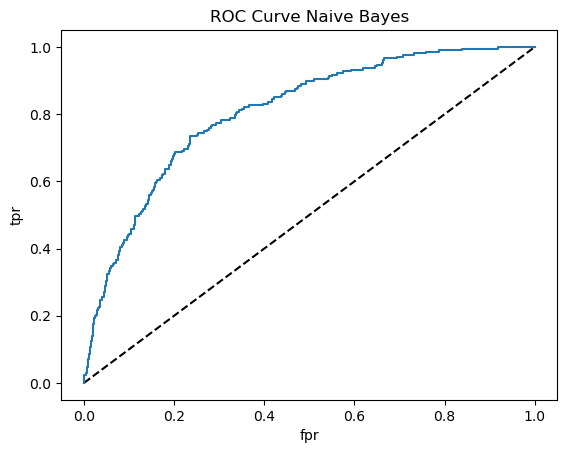

0.8073861392155075


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

fpr, tpr = [], []
clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(attributes, class_labels, test_size=0.20)
clf = clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:, 1])


plt.plot([0,1],[0,1],'k--') 
plt.plot(fpr, tpr, label='NB') 
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

print(roc_auc_score(y_test, pred[:, 1]))

#Based on the shape of the ROC curve, we see that Naive Bayes yielded a relatively high TPR and a relatively low FPR,
#therefore, based on this perspective, we can see that Naive Bayes is a suitable classifier for this model.

#However, if you use both precision and ROC curve to evaluate this classifier, we see that the actual process of 
# deciding whether Naive Bayes is effective in this case is quite nuanced. 

### In attempt to resolve the class imbalance issue, we will implement oversampling through SMOTE

Accuracy: 73.89483055374207
[[724 230]
 [105 102]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       954
           1       0.31      0.49      0.38       207

    accuracy                           0.71      1161
   macro avg       0.59      0.63      0.60      1161
weighted avg       0.77      0.71      0.73      1161



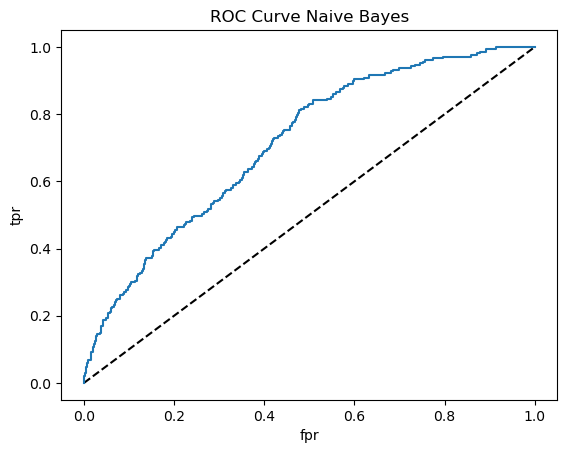

0.7122464274501464


In [13]:
#undersample dataset. (balance the class labels)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# smote = SMOTE(random_state=42)
smote = SMOTE()
# X_res, y_res = smote.fit_resample(attributes, class_labels)
# print(X_res)
clf = GaussianNB()
pipe = Pipeline(steps=[('smote', smote), ('scaler', scaler), ('pca', pca), ('GaussianNB', naive_bayes)])


scores = cross_val_score(pipe, attributes, class_labels, cv=10)       
print("Accuracy:", scores.mean()*100)

X_new, y_new = smote.fit_resample(X_train, y_train)
clf = clf.fit(X_new, y_new)
pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
print(classification_report(y_test, pred))


fpr, tpr = [], []
clf = GaussianNB()
clf = clf.fit(X_new, y_new)
pred = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:, 1])

plt.plot([0,1],[0,1],'k--') 
plt.plot(fpr, tpr, label='NB') 
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

print(roc_auc_score(y_test, pred[:, 1]))

### Although the accuracy dropped after implementing SMOTE, which could have been caused by the class imbalance issue that remains in the test set, we believe this is a more accurate reflection of the performance of our model. 

## K-means

0       0
1       0
2       1
3       1
4       1
       ..
8367    0
8368    0
8369    0
8370    0
8377    0
Name: match, Length: 5803, dtype: int64


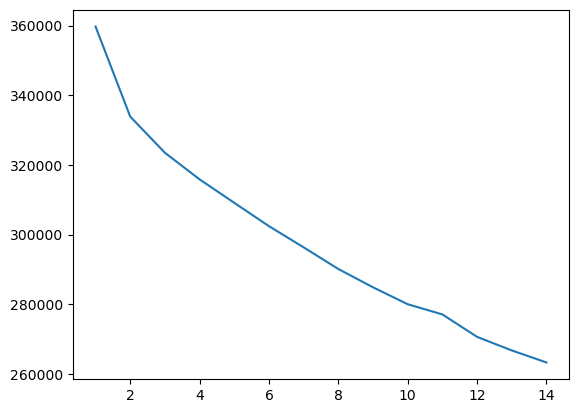

2
0.08426443196974816


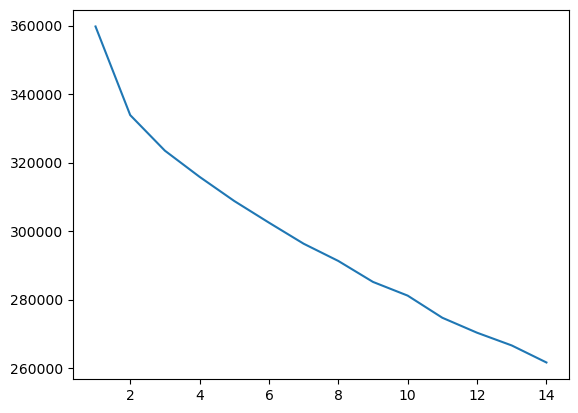

2
0.08426443196974816


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

k_means_data = data
class_labels = k_means_data['match']
attributes = k_means_data.drop(['match'],axis=1)

smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(attributes, class_labels, test_size=0.20)
X_new, y_new = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
pca = PCA()
X_new = pca.fit_transform(X_new)
X_new = pd.DataFrame(X_new)

sse = []
for k in range(1, 15):
    k_means = KMeans(n_clusters = k).fit(X_new)
    sse.append(k_means.inertia_)
plt.figure()
plt.plot(list(range(1,15)), sse)
plt.show()
    
#based on our interpretation of the graph, we select 2, 11, 13 as the candidates for the best k value. Next we will
#compare their silhouette scores

best_score = -2
best_predicted_labels = None
best_k = 0


for k in [2, 11, 13]:
    predicted_cluster_label = KMeans(n_clusters=k).fit_predict(X_new)
    score = silhouette_score(X_new, predicted_cluster_label)
    if best_score < score:
        best_score = score
        best_k = k
        best_predicted_labels = predicted_cluster_label

print(best_k)
print(best_score)

# We are trying to use a new centroid initialization method to see if it improves the performance of our model
sse = []
for k in range(1, 15):
    k_means = KMeans(n_clusters = k, init = "k-means++").fit(X_new)
    sse.append(k_means.inertia_)
plt.figure()
plt.plot(list(range(1,15)), sse)
plt.show()

#based on our interpretation of the graph, we select 2, 10 as the candidates for the best k value. Next we will
#compare their silhouette scores

for k in [2, 10]:
    predicted_cluster_label = KMeans(n_clusters=k).fit_predict(X_new)
    score = silhouette_score(X_new, predicted_cluster_label)
    if best_score < score:
        best_score = score
        best_k = k
        best_predicted_labels = predicted_cluster_label

print(best_k)
print(best_score)




### We tried running the K-means algorithm with hyperparameter tuning using different centroid initialization. After tuning hyperparameter k by comparing their silhouette scores, we found that the best k for both initialization methods is 2. However, the silhouette scores were close to 0 (indicating that the points could be clustered in either cluster), meaning the model generated by the k-means clustering algorithm has a poor performance. We think the performance of the model was negatively impacted by the specificity / subjectivity of the attributes. In comparison, naive bayes fared much better. 

# KNN
Now we will try this using the k-nearest neighbor classification method

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# finding best k
param_grid = {'n_neighbors': np.arange(1, 51)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_new, y_new)

# best parameter and score
print("Best parameter: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
    

Best parameter:  {'n_neighbors': 2}
Best score:  0.9122044201961211


Based on the results from the grid search the best K = 2, with a score of 0.9122. Thats a pretty darn good score, It is also using the data set that has been SMOTE'd PCA'd and Scaled, so we dont have to worry about unbalencing and any of the other stuff. 

Now I will use the test data and see how well it performs.

In [26]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=2).fit(X_new.values, y_new)
predictions = knn.predict(X_test.values)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy using k = 2: {accuracy}")


Accuracy using k = 2: 0.818260120585702
